In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

seed = 42
rng = RandomState(seed)

df = pd.read_csv('./dataset/preprocessed.csv')

X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12599, 59) (12599,)


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10079, 59) (10079,)
Test set:  (2520, 59) (2520,)


In [3]:
# Fill missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [4]:
def cross_validation_score(estimator):
    scores = cross_val_score(
        estimator, X_test, y_test, cv=10, n_jobs=-1,
        scoring='roc_auc'
    )
    
    return scores.mean(), scores.std()


def plot_cross_validation(title, X, Y, error, xlabel, ylabel='ROC AUC'):
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:30<00:00,  7.63s/it]


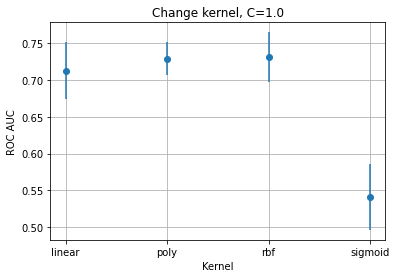

In [6]:
from sklearn.svm import SVC

title = 'Change kernel, C=1.0'
xlabel = 'Kernel'
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
means = []
stddevs = []

for kernel in tqdm(kernels):
    clf = SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)

plot_cross_validation(title, kernels, means, stddevs, xlabel)
plt.savefig('./figure/SVM_change_kernel.png', bbox_inches='tight')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:11<00:00, 11.86s/it]


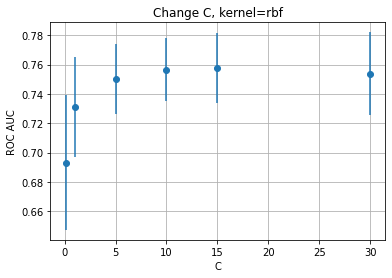

In [7]:
title = 'Change C, kernel=rbf'
xlabel = 'C'
regularizations = [0.1, 1.0, 5.0, 10.0, 15.0, 30.0]
means = []
stddevs = []

for C in tqdm(regularizations):
    clf = SVC(kernel='rbf', C=C)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)

plot_cross_validation(title, regularizations, means, stddevs, xlabel)
plt.savefig('./figure/SVM_change_C.png', bbox_inches='tight')
plt.show()

In [8]:
from sklearn.metrics import roc_auc_score, accuracy_score
clf = SVC(kernel='rbf', C=15.0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('ROC AUC on test set: ', roc_auc_score(y_test, y_pred))

Accuracy on test set:  0.7472222222222222
ROC AUC on test set:  0.7374711705093189


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


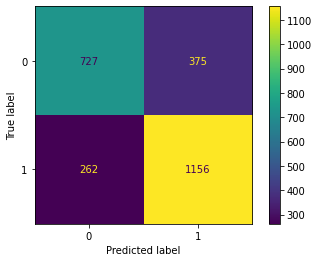

In [9]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.savefig('./figure/SVM_confmat.png')